In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('mall.xlsx')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID',axis=1,inplace=True)

In [5]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

In [6]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.nunique()

Gender     2
Age       51
Income    64
Score     84
dtype: int64

# Visualization

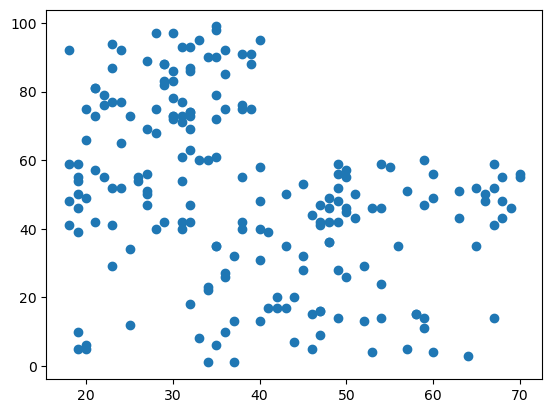

In [8]:
plt.scatter(df.Age,df.Score)

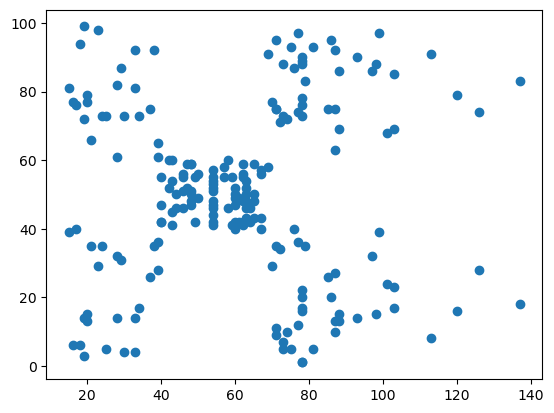

In [9]:
plt.scatter(df.Income,df.Score)

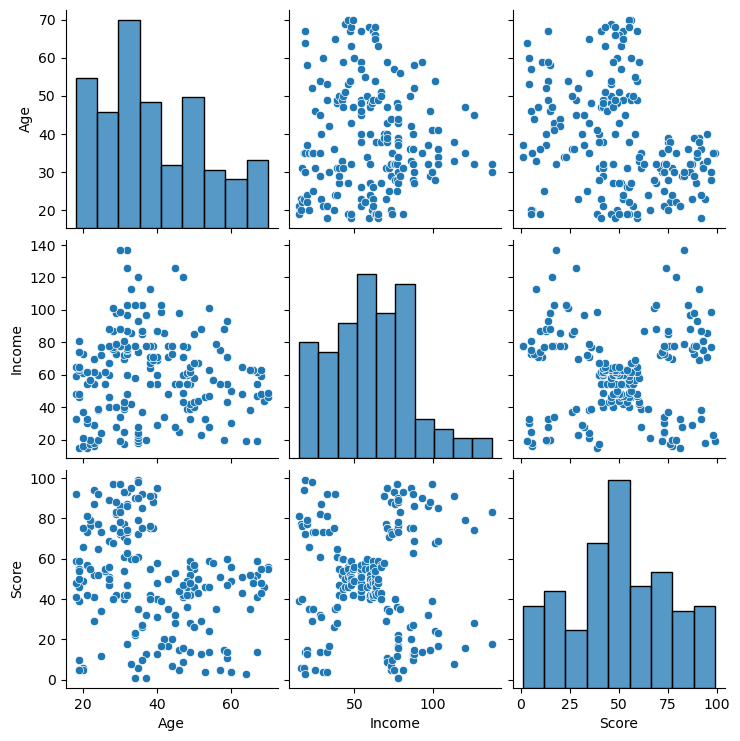

In [10]:

#nijeder jonno histplot, onno keu ashle scatterplot
sns.pairplot(df[['Age','Income','Score']])

In [11]:
import sklearn.cluster as cluster

In [12]:
kmeans = cluster.KMeans()


In [13]:
pred = kmeans.fit_predict(df[['Income','Score']])
pred

array([3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 1, 5, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 6, 1, 1, 1, 1,
       1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 4, 2, 4, 2, 4,
       6, 4, 2, 4, 2, 4, 2, 4, 2, 4, 6, 4, 2, 4, 6, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 6, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       7, 0])

In [14]:
df2 = df.copy()

In [15]:
df2.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
#adding columns
df2['Predicted'] = pred
df2.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,3
1,Male,21,15,81,5
2,Female,20,16,6,3
3,Female,23,16,77,5
4,Female,31,17,40,3


In [17]:
centers = kmeans.cluster_centers_
centers

array([[108.18181818,  82.72727273],
       [ 47.29545455,  51.40909091],
       [ 80.18181818,  12.68181818],
       [ 25.14285714,  19.52380952],
       [ 78.03571429,  81.89285714],
       [ 25.0952381 ,  80.04761905],
       [ 63.72093023,  46.1627907 ],
       [109.7       ,  22.        ]])

In [21]:
df0 = df2[df2.Predicted==0]
df1 = df2[df2.Predicted==1]
df8 = df2[df2.Predicted==2]
df3 = df2[df2.Predicted==3]
df4 = df2[df2.Predicted==4]
df5 = df2[df2.Predicted==5]
df6 = df2[df2.Predicted==6]
df7 = df2[df2.Predicted==7]


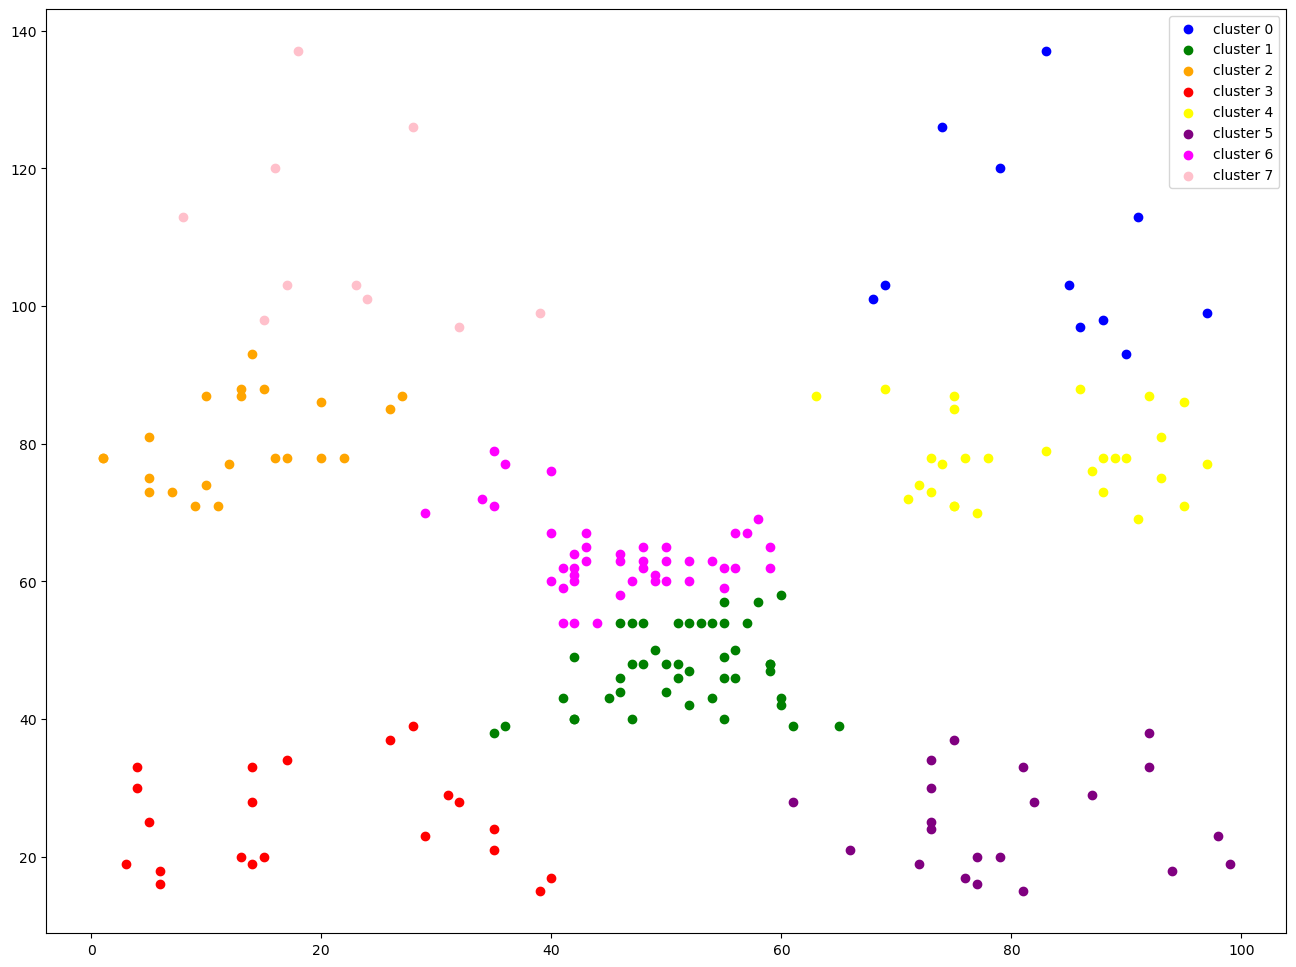

In [22]:
plt.figure(figsize=(16,12))

plt.scatter(df0['Score'],df0['Income'],color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'],color='green',label='cluster 1')
plt.scatter(df8['Score'],df8['Income'],color='orange',label='cluster 2')
plt.scatter(df3['Score'],df3['Income'],color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'],color='yellow',label='cluster 4')
plt.scatter(df5['Score'],df5['Income'],color='purple',label='cluster 5')
plt.scatter(df6['Score'],df6['Income'],color='fuchsia',label='cluster 6')
plt.scatter(df7['Score'],df7['Income'],color='pink',label='cluster 7')

plt.legend()

# Elbow method

In [23]:
from sklearn.cluster import KMeans

In [24]:
wcss = []

In [25]:
cluster = range(1,15)

for k in cluster:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df[['Income','Score']])
    wcss.append(kmean.inertia_)

F:\Antim_Doc_softwar\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.343617936593,
 25011.839349156588,
 21850.165282585633,
 19657.783608703954,
 17586.632447340515,
 15926.627039985106,
 14745.295120090712,
 13110.73467392822]

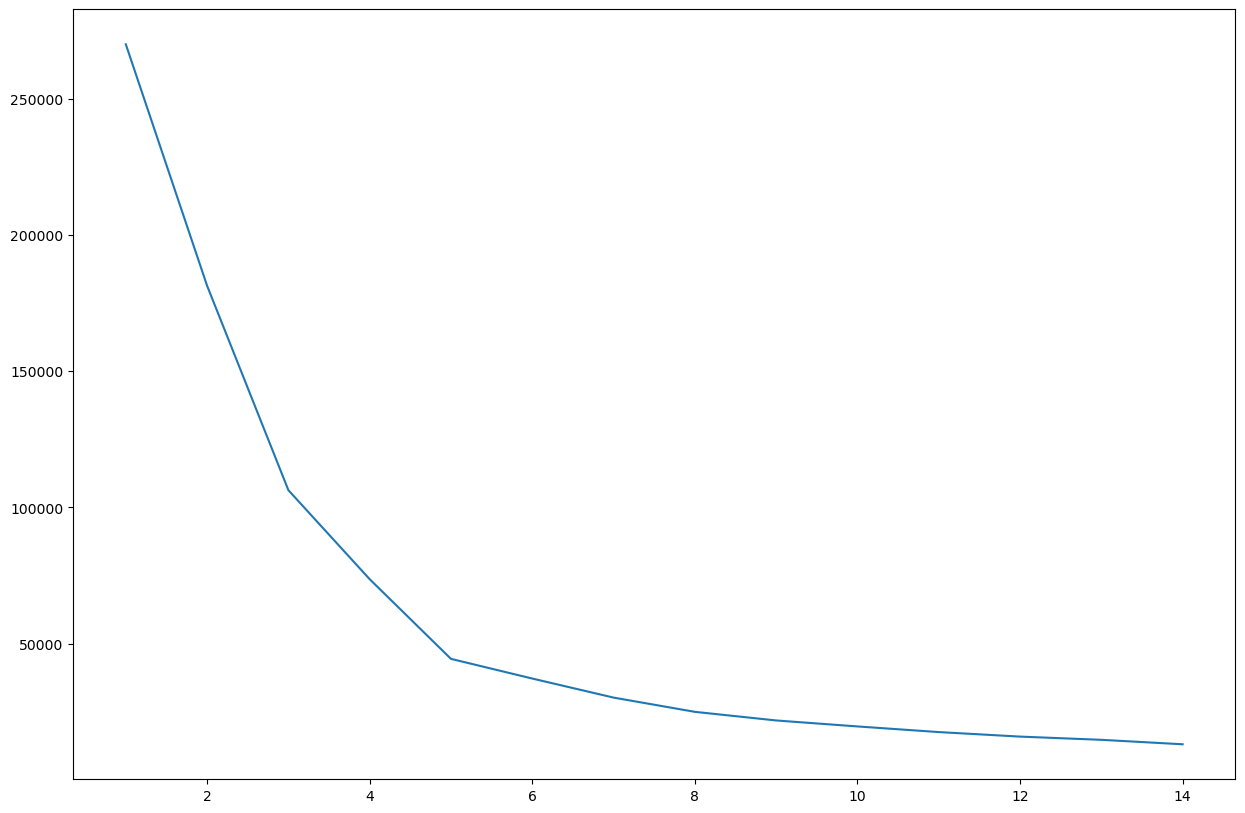

In [27]:
plt.figure(figsize=(15,10))
plt.plot(cluster,wcss)

In [29]:
!pip install kneed
from kneed import KneeLocator

In [30]:
from kneed import KneeLocator

In [31]:
kn = KneeLocator(cluster,wcss,direction='decreasing',curve='convex')

In [32]:
kn

In [33]:
print('optimal number of cluster is: ',kn.knee)

optimal number of cluster is:  5


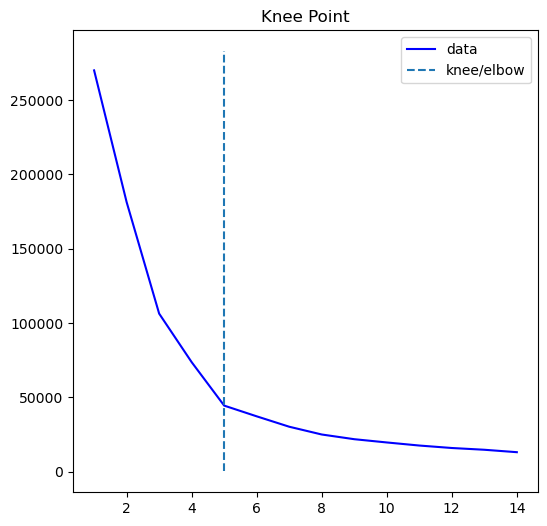

In [34]:
kn.plot_knee()

# After select best K

In [35]:
import sklearn.cluster as cluster

In [36]:
kmeans = cluster.KMeans(n_clusters=5)


In [37]:
predicted = kmeans.fit_predict(df[['Income','Score']])


In [38]:
predicted

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [39]:
df['Predicted'] = predicted

In [40]:
df.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3
